# Homework 1
Mateusz Błajda (mb406098)

## Importing Libraries 

In [84]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import plot_roc_curve, roc_auc_score, plot_confusion_matrix

## Loading Dataset
loading brain stroke dataset

In [85]:
dataset_path = '../../../../brain_stroke.csv'
df = pd.read_csv(dataset_path)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


## Data preprocessing

Changing text values to binary or one hot encoding

In [86]:
df['gender'] = np.where(df['gender'] == 'Female', 1, 0)
df['ever_married'] = np.where(df['ever_married'] == 'Yes', 1, 0)
df['Residence_type'] = np.where(df['Residence_type'] == 'Urban', 1, 0)
w = pd.get_dummies(df['work_type'], prefix='work_type')
df = df.drop('work_type', axis=1).join(w)
s = pd.get_dummies(df['smoking_status'], prefix='smoking')
df = df.drop('smoking_status', axis=1).join(s)
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,smoking_Unknown,smoking_formerly smoked,smoking_never smoked,smoking_smokes
0,0,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,0,1,0,0
1,0,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,0,0,1,0
2,1,49.0,0,0,1,1,171.23,34.4,1,0,1,0,0,0,0,0,1
3,1,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,0,1,0
4,0,81.0,0,0,1,1,186.21,29.0,1,0,1,0,0,0,1,0,0


## Preparing the dataset
spliting into train and test dataset (randomly at 8:2 ratio)

In [87]:
train, test = train_test_split(df, test_size= 0.2, random_state=42)
trainX = train.drop('stroke', axis=1)
trainY = train['stroke']

testX = test.drop('stroke', axis=1)
testY = test['stroke']

Calculating weights, as the data is heavly imballanced

In [88]:
neg_weight = np.mean(trainY)
print(f"negative sample weight: {neg_weight}")
weights = trainY.copy()
weights[trainY == 1] = 1 / neg_weight
weights[trainY == 0] = 1

negative sample weight: 0.048694779116465865


## Training the models
I trained 3 different models on this dataset:
* Logistic regression
* Random Forest
* AdaBoost

In [89]:
def test_model(model, testX, testY, model_name="Model"):
    score = model.score(testX, testY)
    roc_auc = roc_auc_score(testY.to_numpy(), model.predict_proba(testX)[:,1])
    print(f"{model_name} accuracy: {score}, ROC AUC: {roc_auc}")
    plot_roc_curve(model, testX, testY)
    plot_confusion_matrix(model, testX, testY)

Logistic Regression accuracy: 0.7221664994984955, ROC AUC: 0.8518714897293901


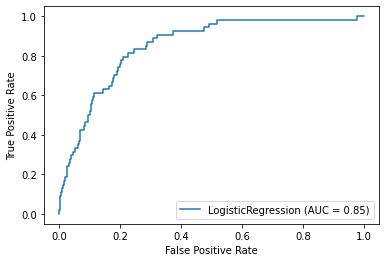

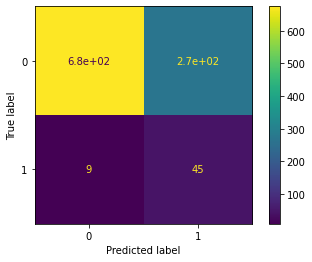

In [90]:
model1 = LogisticRegression(max_iter=1000, random_state=42).fit(trainX, trainY, weights)
test_model(model1, testX, testY, "Logistic Regression")

### Logistic Regression results:

We got a lot of false positives (the most of all the models) and 9 false negatives (18%). That's the best result of all (sensitivity-wise). But the amount of false negatives is bad.
Still, this model have the best ROC AUC.

Random Forest accuracy: 0.7723169508525577, ROC AUC: 0.727514630218766


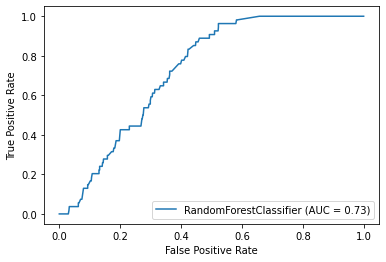

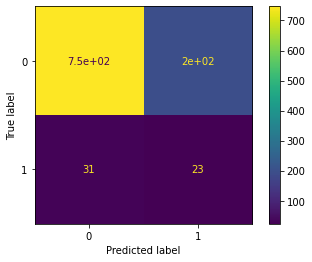

In [115]:
model2 = RandomForestClassifier(n_estimators=4, random_state=42, max_depth=4).fit(trainX, trainY, weights)
test_model(model2, testX, testY, "Random Forest")

### Random forest results:

We got a lot of false positives (but still, the least of all of the models), but we got 62% of false negatives. That's very bad, because we care about sensitivity (probably we should change threshold value according, but it will result in false positives increase). The ROC AOC is the worst of all the models.

AdaBoost accuracy: 0.7502507522567703, ROC AUC: 0.7628922666038255


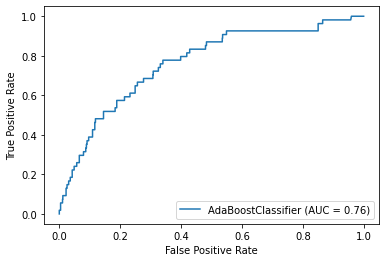

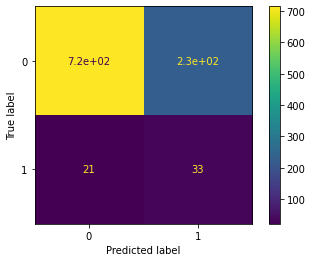

In [92]:
model3 = AdaBoostClassifier(n_estimators=256, random_state=42).fit(trainX, trainY, weights)
test_model(model3, testX, testY, "AdaBoost")

### AdaBoost results:

We got a lot of false positives. We care more about detecting positive cases so a lot of false positives is not as bad. But we also got 41% of false negatives which is not very good. The ROC AOC places this model in the middle, 

## Results:
Logistic regression got the best results in regard to ROC AUC, and the best accuracy. We care more about detecting positive samples (sensitivity). The final verdict depends on how sensitive our model should be. After picking sensitivity we can measure whish model gives the less false positives.